In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise e exploração dos dados
Aqui utilizaremos os três arquivos gerados em ***1 - Coleta, processamento e tratamento de dados.ipynb***. Seus dados ficarão armazenados nos seguintes DataFrames:
- df_pl: dados de pedidos em formato longo, com uma linha para cada produto presente nos pedidos;
- df_pw: dados de pedidos em formato wide, com uma linha para cada pedido;
- df_c: dados de clientes, com uma linha para cada cliente.
<p><br>
O significado de cada campo é bastante intuitivo, podendo ser reforçado por meio de análise do notebook mencionado acima. <b><font color='red'>MELHORAR ESSA DESCRIÇÃO DE CAMPOS </font></b>

In [3]:
df_pl = pd.read_csv('arquivos/pedidos_long_final.csv')
df_pl.head()

,id_pedido,data_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,nome_produto,vl_unitario,tipo_pagamento,agente,hora_pedido,categoria,qt_itens,vl_total
0,54,2020-07-03,39,aldeota,fortaleza,60150060,agua de coco,3.0,Pagar ao retirar na loja,android,11:30:53,agua energeticos e chas,2,6.0
1,54,2020-07-03,39,aldeota,fortaleza,60150060,cajuina,10.0,Pagar ao retirar na loja,android,11:30:53,sucos refrescos e refrigerantes,3,30.0
2,54,2020-07-03,39,aldeota,fortaleza,60150060,couve,3.0,Pagar ao retirar na loja,android,11:30:53,verduras,2,6.0
3,54,2020-07-03,39,aldeota,fortaleza,60150060,doce de leite,12.0,Pagar ao retirar na loja,android,11:30:53,doces e sobremesas,1,12.0
4,54,2020-07-03,39,aldeota,fortaleza,60150060,queijo coalho,25.0,Pagar ao retirar na loja,android,11:30:53,queijos,2,50.0


In [58]:
df_pw = pd.read_csv('arquivos/pedidos_wide_final.csv')
df_pw.head()

,id_pedido,data_pedido,hora_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,tipo_pagamento,agente,i_agua de coco,...,vl_tot_pimentao [ 500g ],i_abobrinha,qt_abobrinha,vl_tot_abobrinha,i_quiabo [ kg ],qt_quiabo [ kg ],vl_tot_quiabo [ kg ],i_pepino amarelo [ unidade ],qt_pepino amarelo [ unidade ],vl_tot_pepino amarelo [ unidade ]
0,54,2020-07-03,11:30:53,39,aldeota,fortaleza,60150060,Pagar ao retirar na loja,android,True,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
1,56,2020-07-03,11:32:27,38,sao gerardo,fortaleza,60320105,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
2,59,2020-07-03,11:38:01,35,manoel satiro,fortaleza,60713480,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
3,60,2020-07-03,11:38:27,33,rodolfo teofilo,fortaleza,60431075,Débito/Transferência,android,True,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
4,64,2020-07-03,11:49:13,40,rodolfo teofilo,fortaleza,60430660,Cartão de Crédito,android,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0


## Popularidade das categorias de produtos

Primeiramente vamos ver qual categoria mais aparece nos pedidos, independente da quantidade de itens, levando-se em consideração somente sua presença neles. O eixo x representa a quantidade de vezes que produtos de cada categoria foram acrescentados aos pedidos.

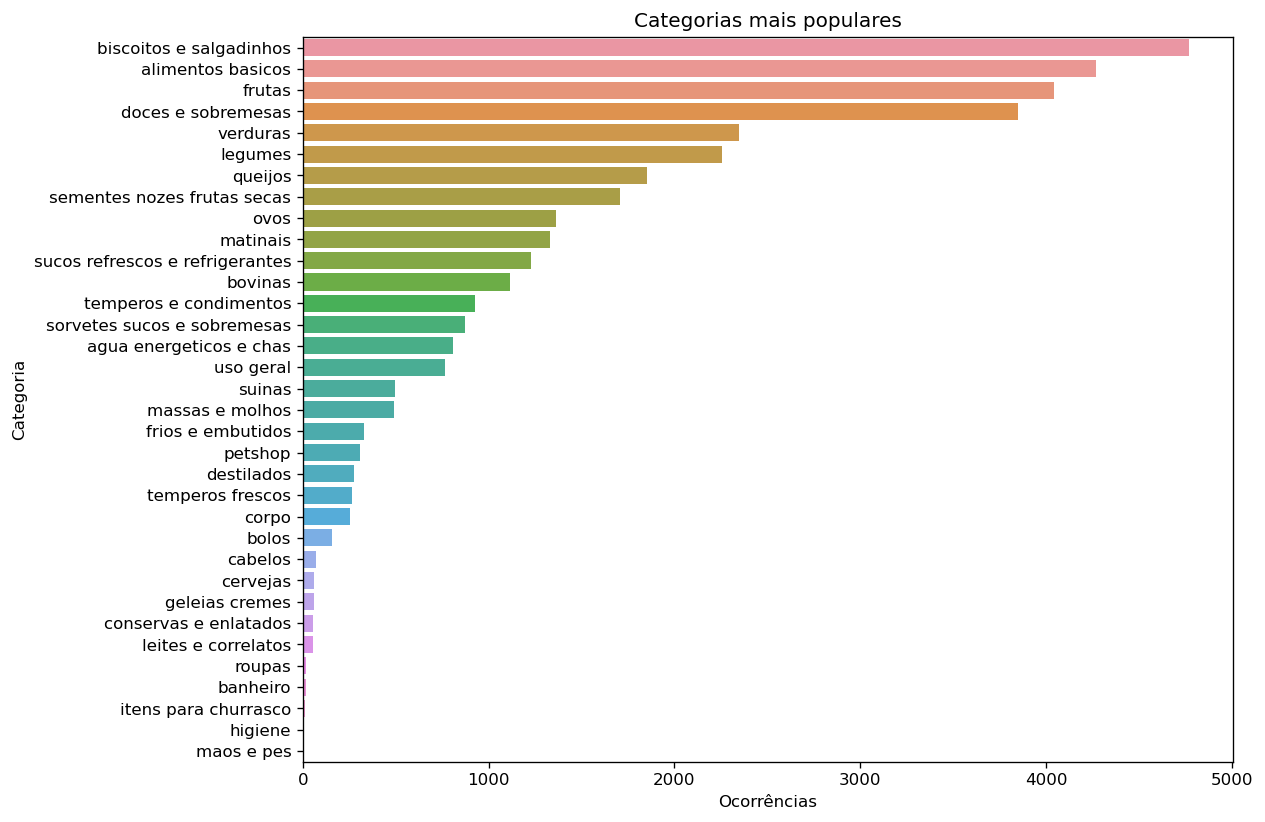

In [5]:
plt.figure(dpi=120,figsize=(10,8))
ax = sns.countplot(data=df_pl,y='categoria',order=df_pl['categoria'].value_counts().index)
ax.set(xlabel='Ocorrências',ylabel='Categoria',title='Categorias mais populares');

<font color='red'><b>VAMOS DEIXAR ESSA ANÁLISE PRA DEPOIS, QUANDO EU CONSEGUIR BAIXAR OS PRODUTOS DO MERCADOS E RETREINAR O MODELO DE CATEGORIZAÇÃO DE PRODUTOS. NÃO ESQUECER DE GERAR O ARQUIVO DO DATAFRAME LONGO DE PEDIDOS NO NOTEBOOOK 1<i></font></b></i>

## Popularidade dos produtos

Qual são os 20 produtos que mais apareceram aparecem nos pedidos, independente da quantidade que foi incluída em cada um deles? Em outras palavras, em quantos pedidos apareceu cada um desses produtos?

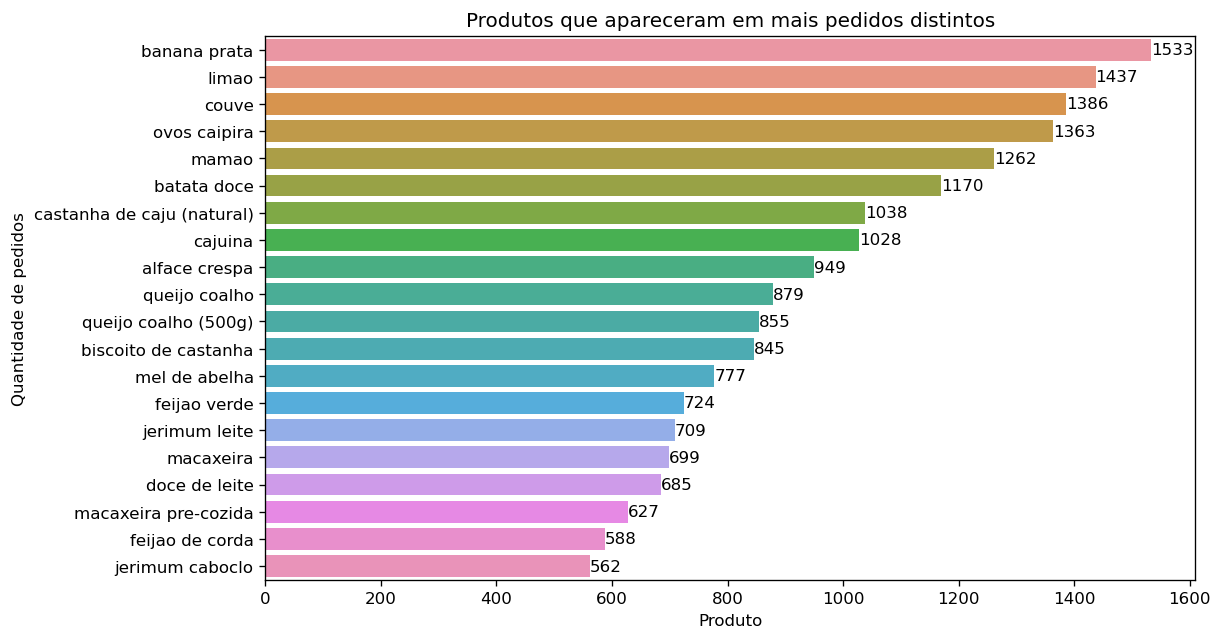

In [6]:
plt.figure(dpi=120,figsize=(10,6))
ax = sns.countplot(data=df_pl,y='nome_produto',order=df_pl['nome_produto'].value_counts().index[:20])
ax.set(title='Produtos que apareceram em mais pedidos distintos',xlabel='Produto',ylabel='Quantidade de pedidos')
ax.bar_label(ax.containers[0]);

E quais são os produtos que mais faturam?

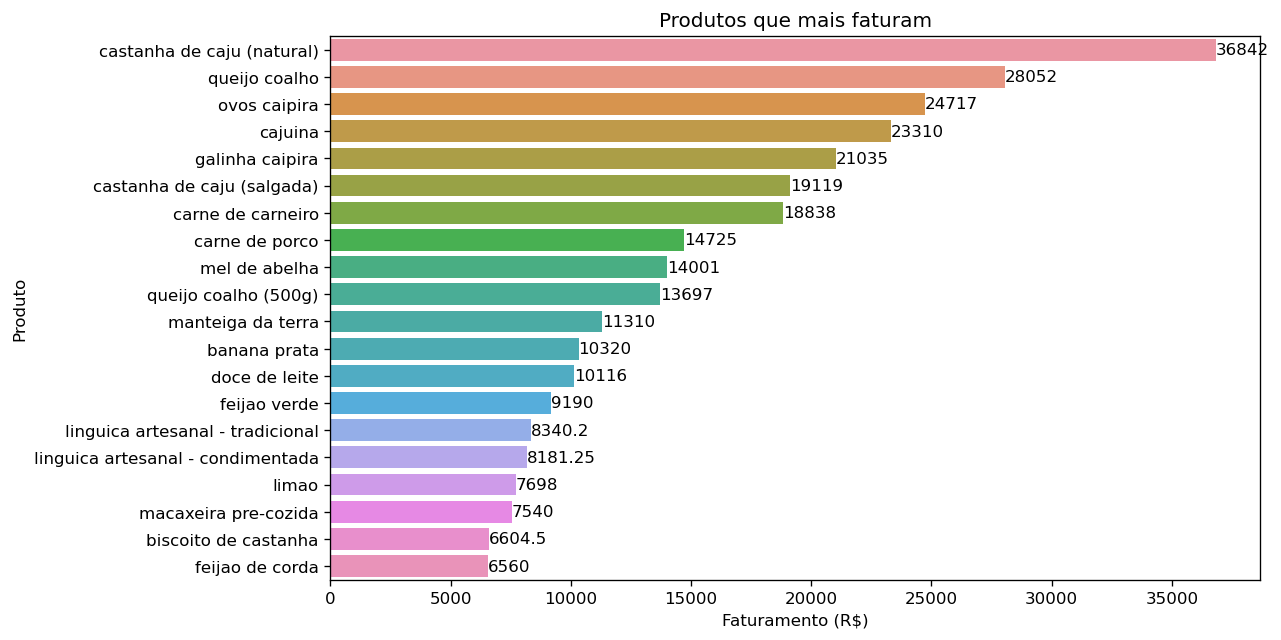

In [7]:
dados = df_pl.groupby('nome_produto').agg({'vl_total':['sum']})['vl_total'].nlargest(20,columns='sum')

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=dados.index,x=dados['sum'])
ax.set(title='Produtos que mais faturam',xlabel='Faturamento (R$)',ylabel='Produto')
ax.bar_label(ax.containers[0]);

E quais produtos são unitariamente mais vendidos?

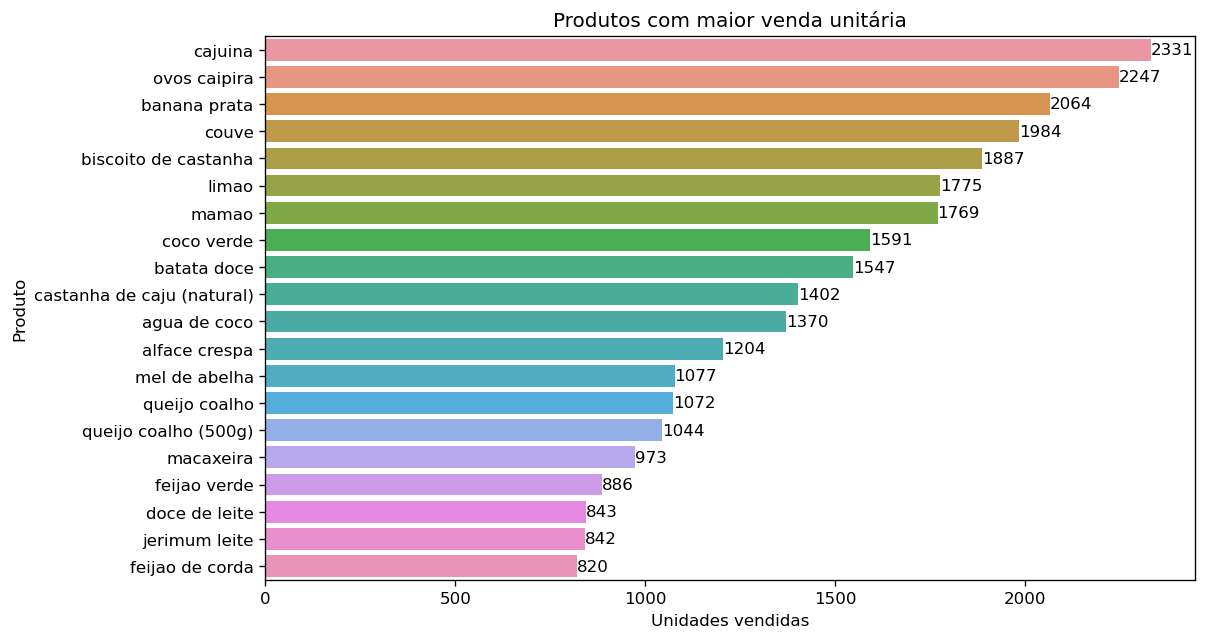

In [8]:
dados = df_pl.groupby('nome_produto').agg({'qt_itens':['sum']})['qt_itens'].nlargest(20,columns='sum')

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=dados.index,x=dados['sum'])
ax.set(title='Produtos com maior venda unitária',xlabel='Unidades vendidas',ylabel='Produto')
ax.bar_label(ax.containers[0]);

## Como os clientes acessam a loja virtual?
Quais as plataformas mais utilizada pelos clientes? Esta informação pode ser valiosa para refnamento da implementação do site de compras.

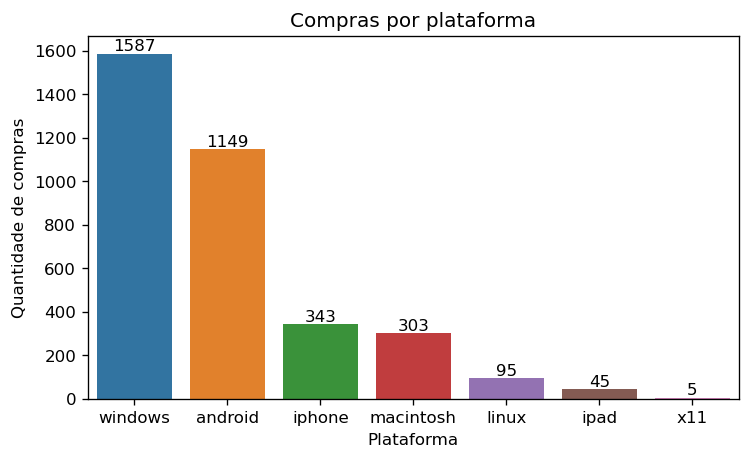

In [43]:
dados = df_pl.groupby('id_pedido')['agente'].agg(pd.Series.mode)

plt.figure(dpi=120,figsize=(7,4))
ax = sns.countplot(data=dados,x=dados.index,order=dados.value_counts().index)
ax.set(title='Compras por plataforma',xlabel='Plataforma',ylabel='Quantidade de compras')
ax.bar_label(ax.containers[0]);

Existe alguma relação entre o valor total dos pedidos e as plataformas utilizadas pelos clientes?

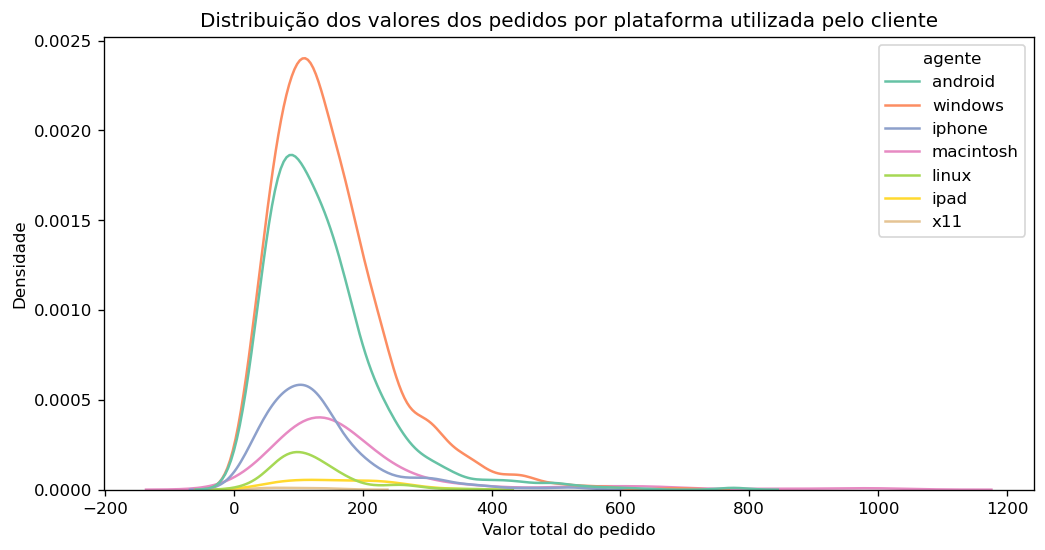

In [90]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='vl_final_pedido',hue='agente',palette='Set2')
ax.set(title='Distribuição dos valores dos pedidos por plataforma utilizada pelo cliente',
       xlabel='Valor total do pedido',ylabel='Densidade');

Podemos ver que, no geral, a distribuição de valores por plataforma não apresenta diferenças significativas.

## Como os clientes pagam suas contas?
Qual a popularidade de cada meio de pagamento disponível?

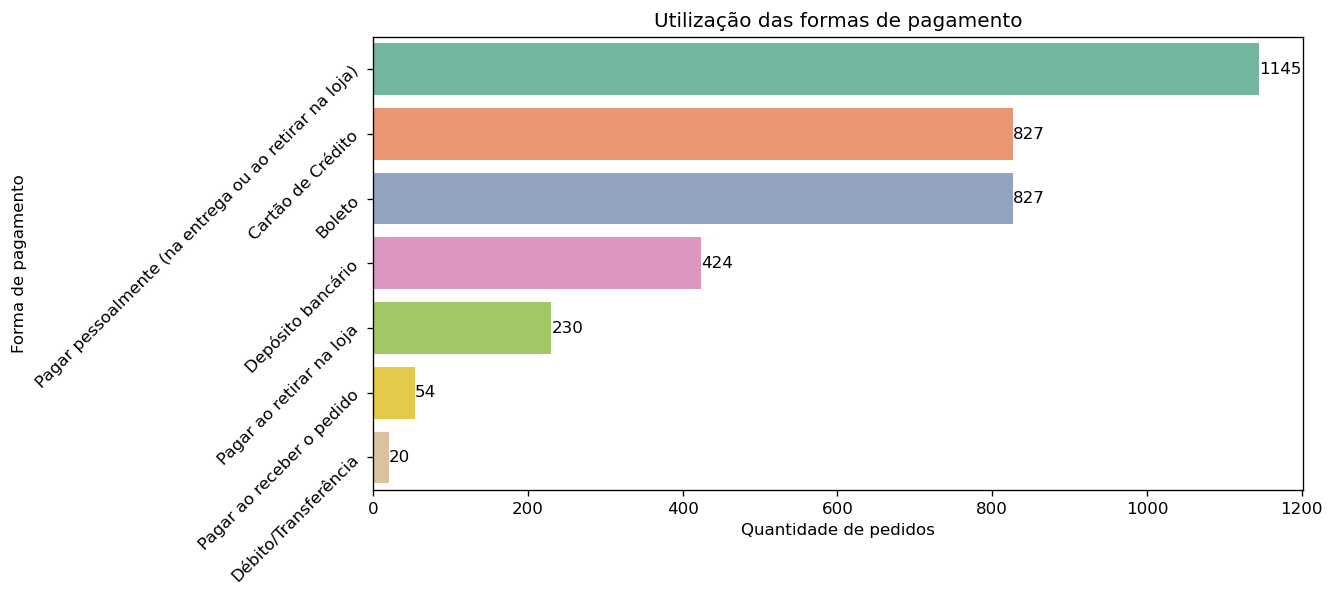

In [97]:
dados = df_pl.groupby('id_pedido')['tipo_pagamento'].agg(pd.Series.mode)

plt.figure(dpi=120,figsize=(10,5))
ax = sns.countplot(data=dados,y=dados.index,order=dados.value_counts().index,palette='Set2')
ax.set(title='Utilização das formas de pagamento',xlabel='Quantidade de pedidos',ylabel='Forma de pagamento')
plt.yticks(rotation=45)
ax.bar_label(ax.containers[0]);

Existe alguma relação entre a forma de pagamento e os valor final dos pedidos?

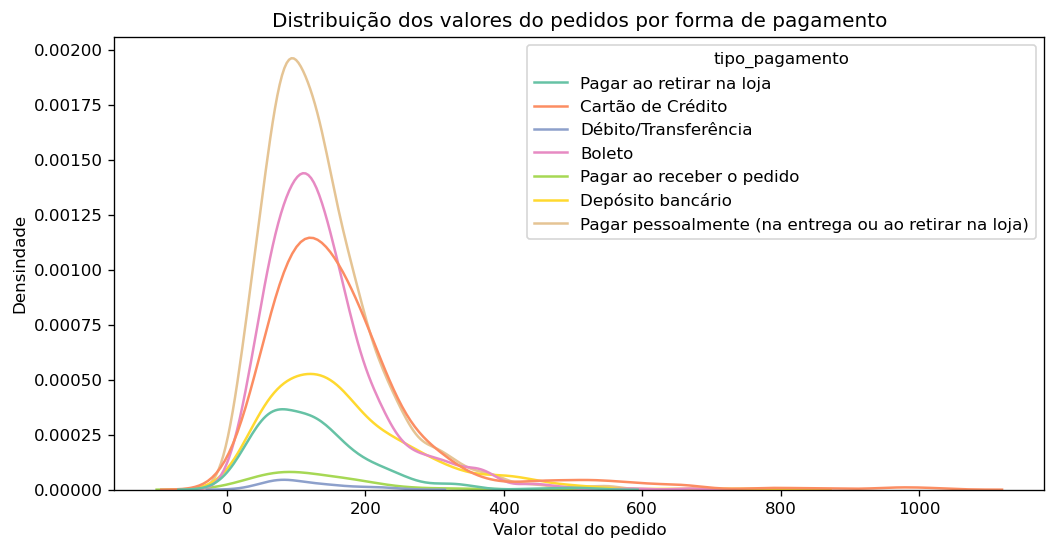

In [92]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='vl_final_pedido',hue='tipo_pagamento',palette='Set2')
ax.set(title='Distribuição dos valores do pedidos por forma de pagamento',ylabel='Densindade',
       xlabel='Valor total do pedido');

É possível perceber que pagamentos para retirada na loja tendem a ter um valor um pouco mais baixo, talvez porque o cliente terá que carregar os produtos. Será que isso fica mais evidente se verificarmos a quantidade de itens nos pedidos?

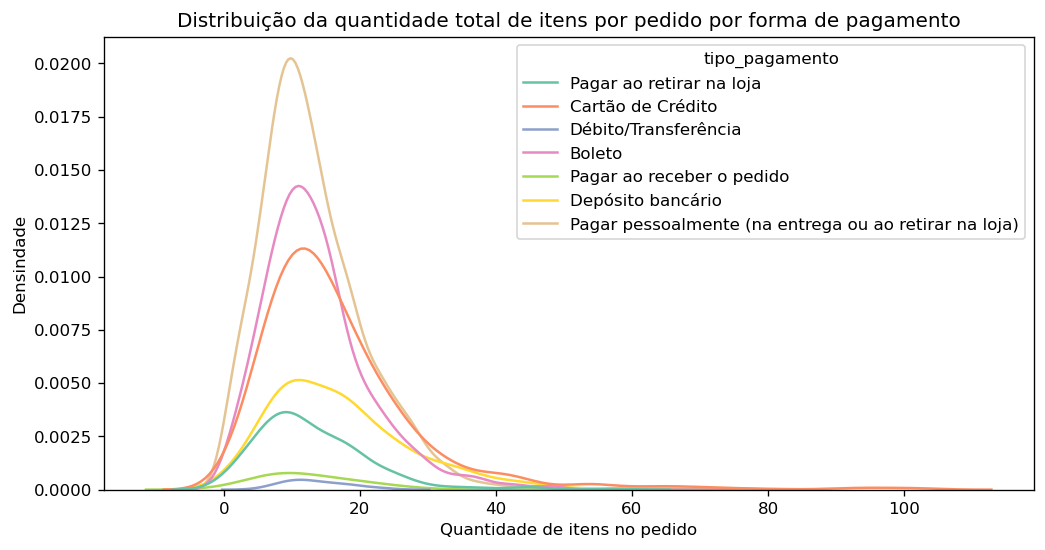

In [98]:
plt.figure(dpi=120,figsize=(10,5))
ax = sns.kdeplot(data=df_pw,x='qt_final_itens',hue='tipo_pagamento',palette='Set2')
ax.set(title='Distribuição da quantidade total de itens por pedido por forma de pagamento',ylabel='Densindade',
       xlabel='Quantidade de itens no pedido');

No final das contas não foi possível verificar diferença mais significativa ao utilizarmos a quantidade de itens por pedido.

## Quantidade de itens por pedid e valor final da compra
Os gráficos acima sugerem que verifiquemos a correção entre algo bastante óbvio: a quanidade de itens por pedido e seu valor total.

In [ ]:
scatterplot!